# <font color='red'> Health Insurance cross sell prediction </font>

![](https://m.foolcdn.com/media/dubs/original_images/Getty_-_insurance_life_car_home_family_protect_coverage.jpg)

# Objective
* Understand what is Cross-sell using Vehicle insurance data.
* Learn how to build a model for cross-sell prediction.

# What is Cross-Sell Prediction?
* It is important to understand the problem domain and key terms used in the definition of a problem before beginning a project. In the financial services industry, cross-selling is a popular term.

* Cross-selling involves selling complementary products to existing customers. It is one of the highly effective techniques in the marketing industry.

* To understand better, suppose you are a bank representative and you try to sell a mutual fund or insurance policy to your existing customer. The main objective behind this method is to increase sales revenue and profit from the already acquired customer base of a company.

* Cross-selling is perhaps one of the easiest ways to grow the business as they have already established a relationship with the client. Further, it is more profitable as the cost of acquiring a new customer is comparatively higher.

# Problem Statement for Cross-Sell Prediction Problem
* In this project, our client is an insurance company XYZ limited that has provided Health Insurance to its customers. Now, They want to build a model to predict whether the policyholders from the past year will also be interested in Vehicle Insurance provided by the company.

* Developing a model to estimate whether a customer will be interested in a vehicle insurance policy is extremely helpful for the company. This would enable the organization to plan its communication strategy so that it can reach out to these customers and optimize its business model.

* The problem definition specifies that in order to predict, whether the customer would be interested in Vehicle insurance, we have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# Hypothesis Generation for Cross-Sell Prediction
* Let me state some hypotheses from our problem statement.
* Male customers are more tend to buy vehicle insurance than females.
* The middle-aged customers would be more interested in the insurance offer.
* Customers having a driving license are more prone to convert.
* Those with new vehicles would be more interested in getting insurance.
* The customers who already have vehicle insurance won’t be interested in getting another.
* If the Customer got his/her vehicle damaged in the past, they would be more interested in buying insurance.
* The above mentioned are just a few examples of hypothesis generation.

# Data Description
* id: Unique ID for the customer

* Gender: Gender of the customer

* Age: Age of the customer

* Driving_License 0 : Customer does not have DL, 1 : Customer already has DL

* Region_Code: Unique code for the region of the customer

* Previously_Insured 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

* Vehicle_Age: Age of the Vehicle

* Vehicle_Damage 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

* Annual_Premium: The amount customer needs to pay as premium in the year

* PolicySalesChannel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

* Vintage: Number of Days, Customer has been associated with the company

* Response 1 : Customer is interested, 0 : Customer is not interested

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.shape

(381109, 12)

(381109, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 

* Here, we will see the basic details of the features in the given dataset. Like the columns, non-null values in each column, and the respective data type.

* In this dataset, we have 12 columns of different data types like int64, float64, and object.

In [5]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

* We don’t have any missing values in this data. Hence we can move forward to the Exploratory data analysis step.

# Exploratory Data Analysis
* Before jumping into modelling and creating a machine learning-based solution for the given problem, it is important to understand the basic traits of the data.

In [6]:
#!pip install pandas-profiling

In [7]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_file(output_file='output.html')

## Univariate Analysis

<Axes: title={'center': 'Variable Response'}, xlabel='Response', ylabel='count'>

<Axes: title={'center': 'Variable Response'}, xlabel='Response', ylabel='count'>

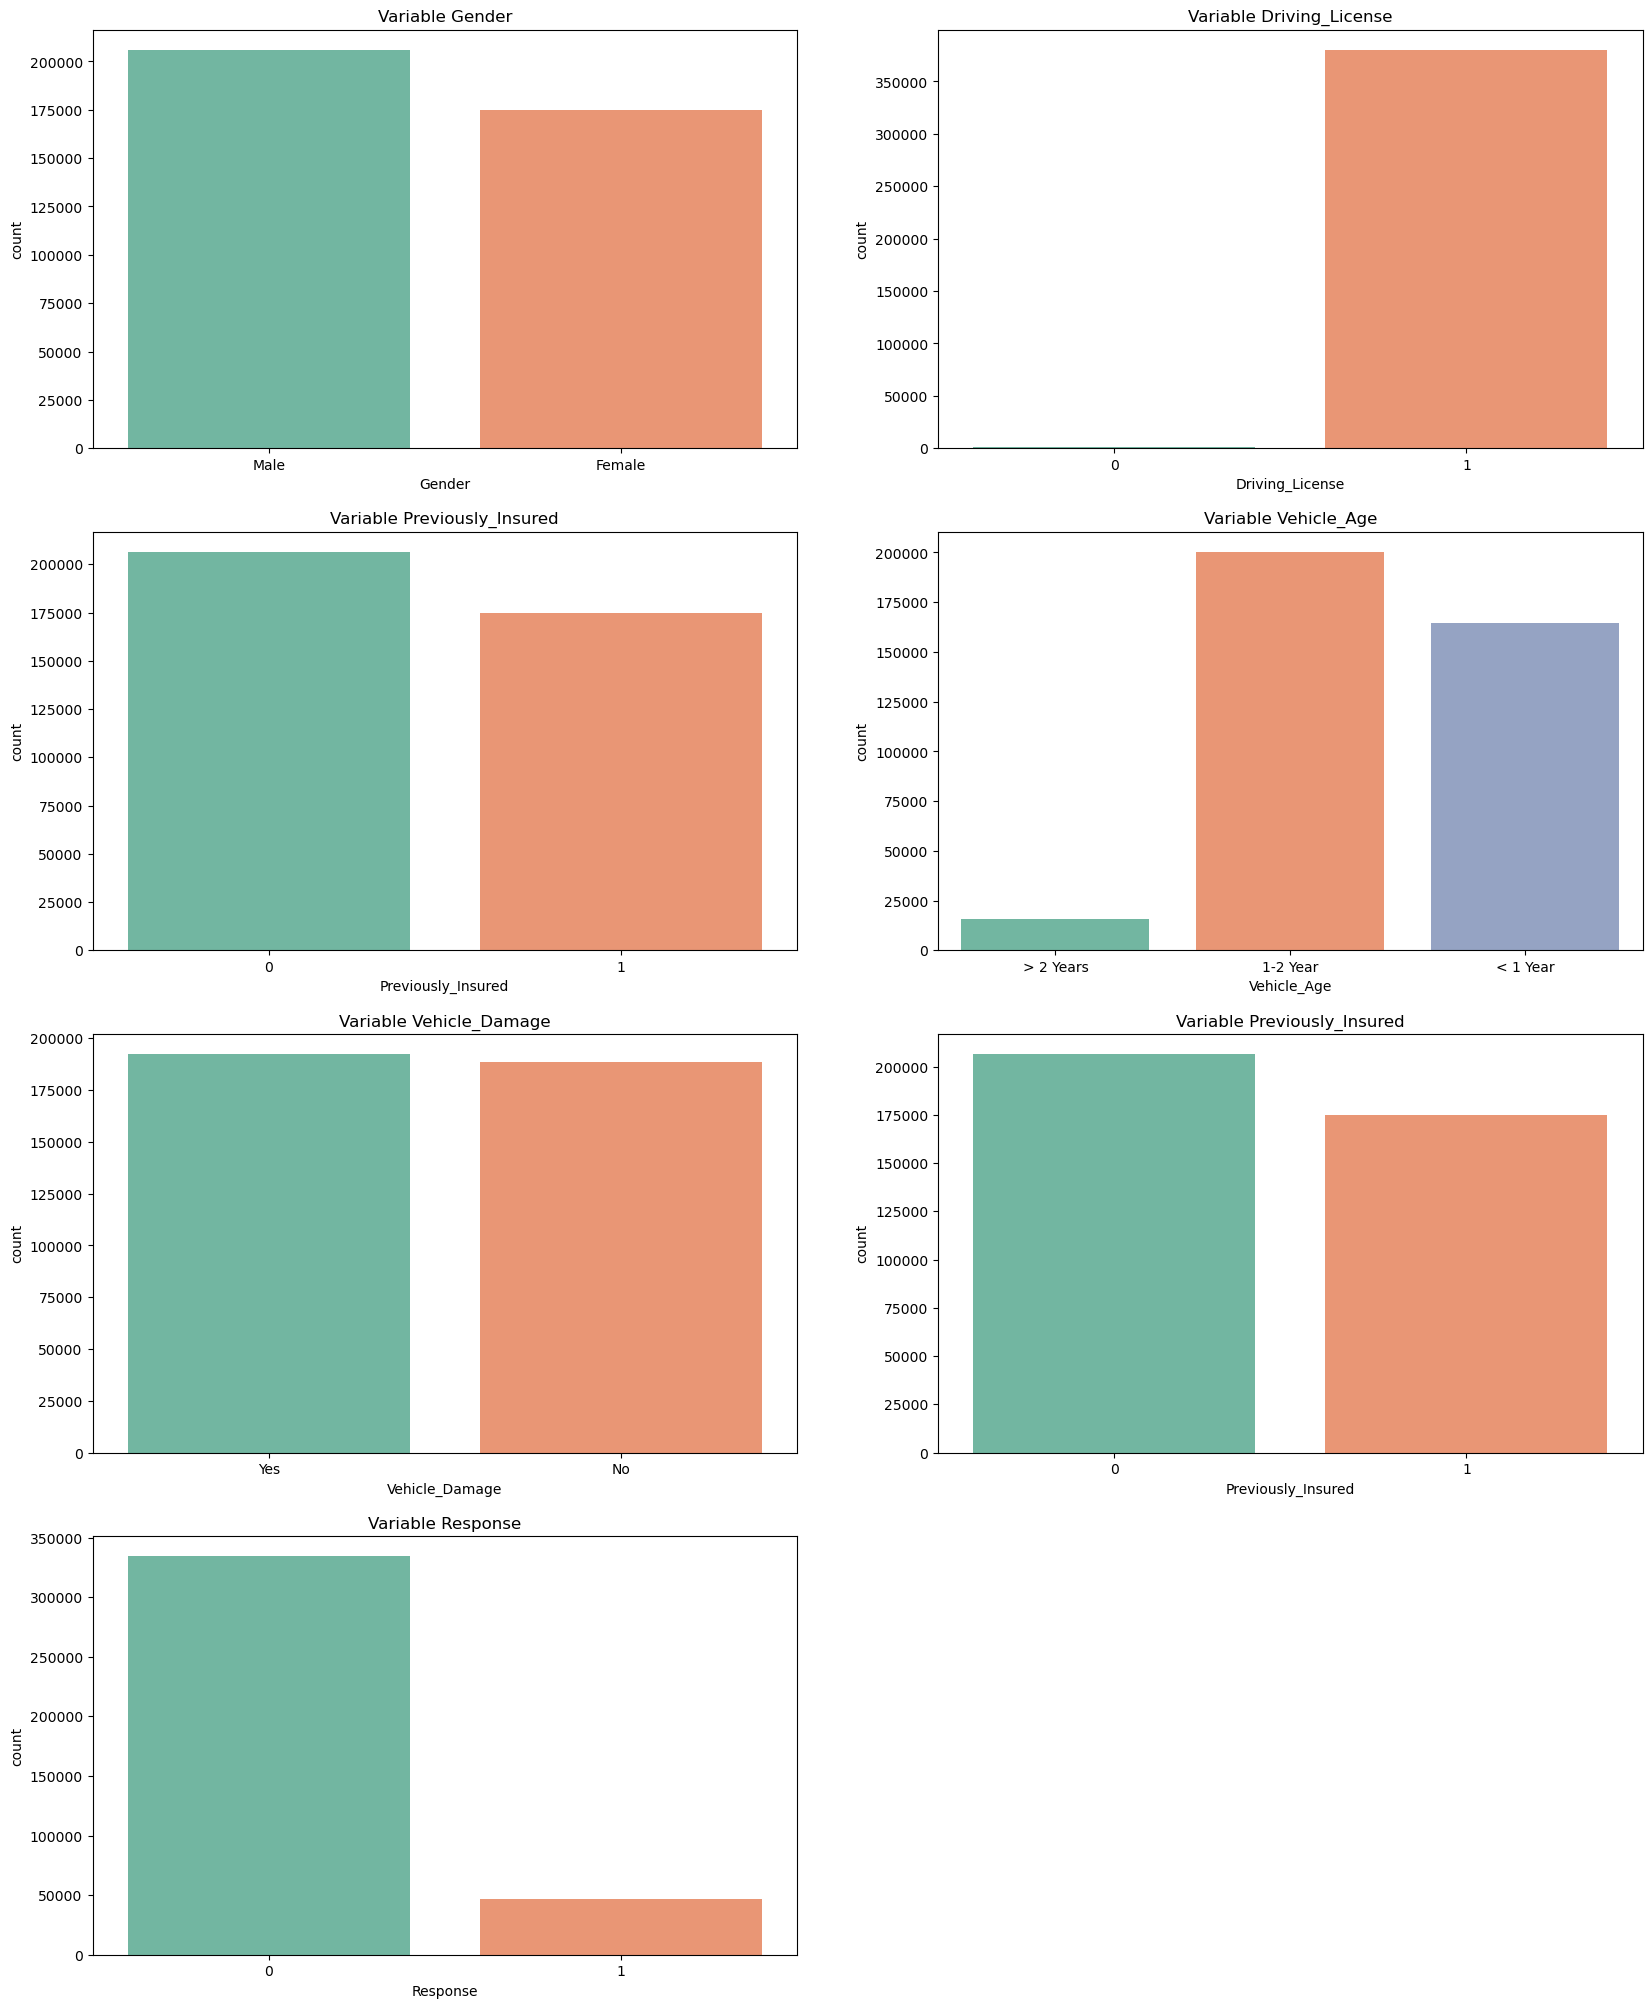

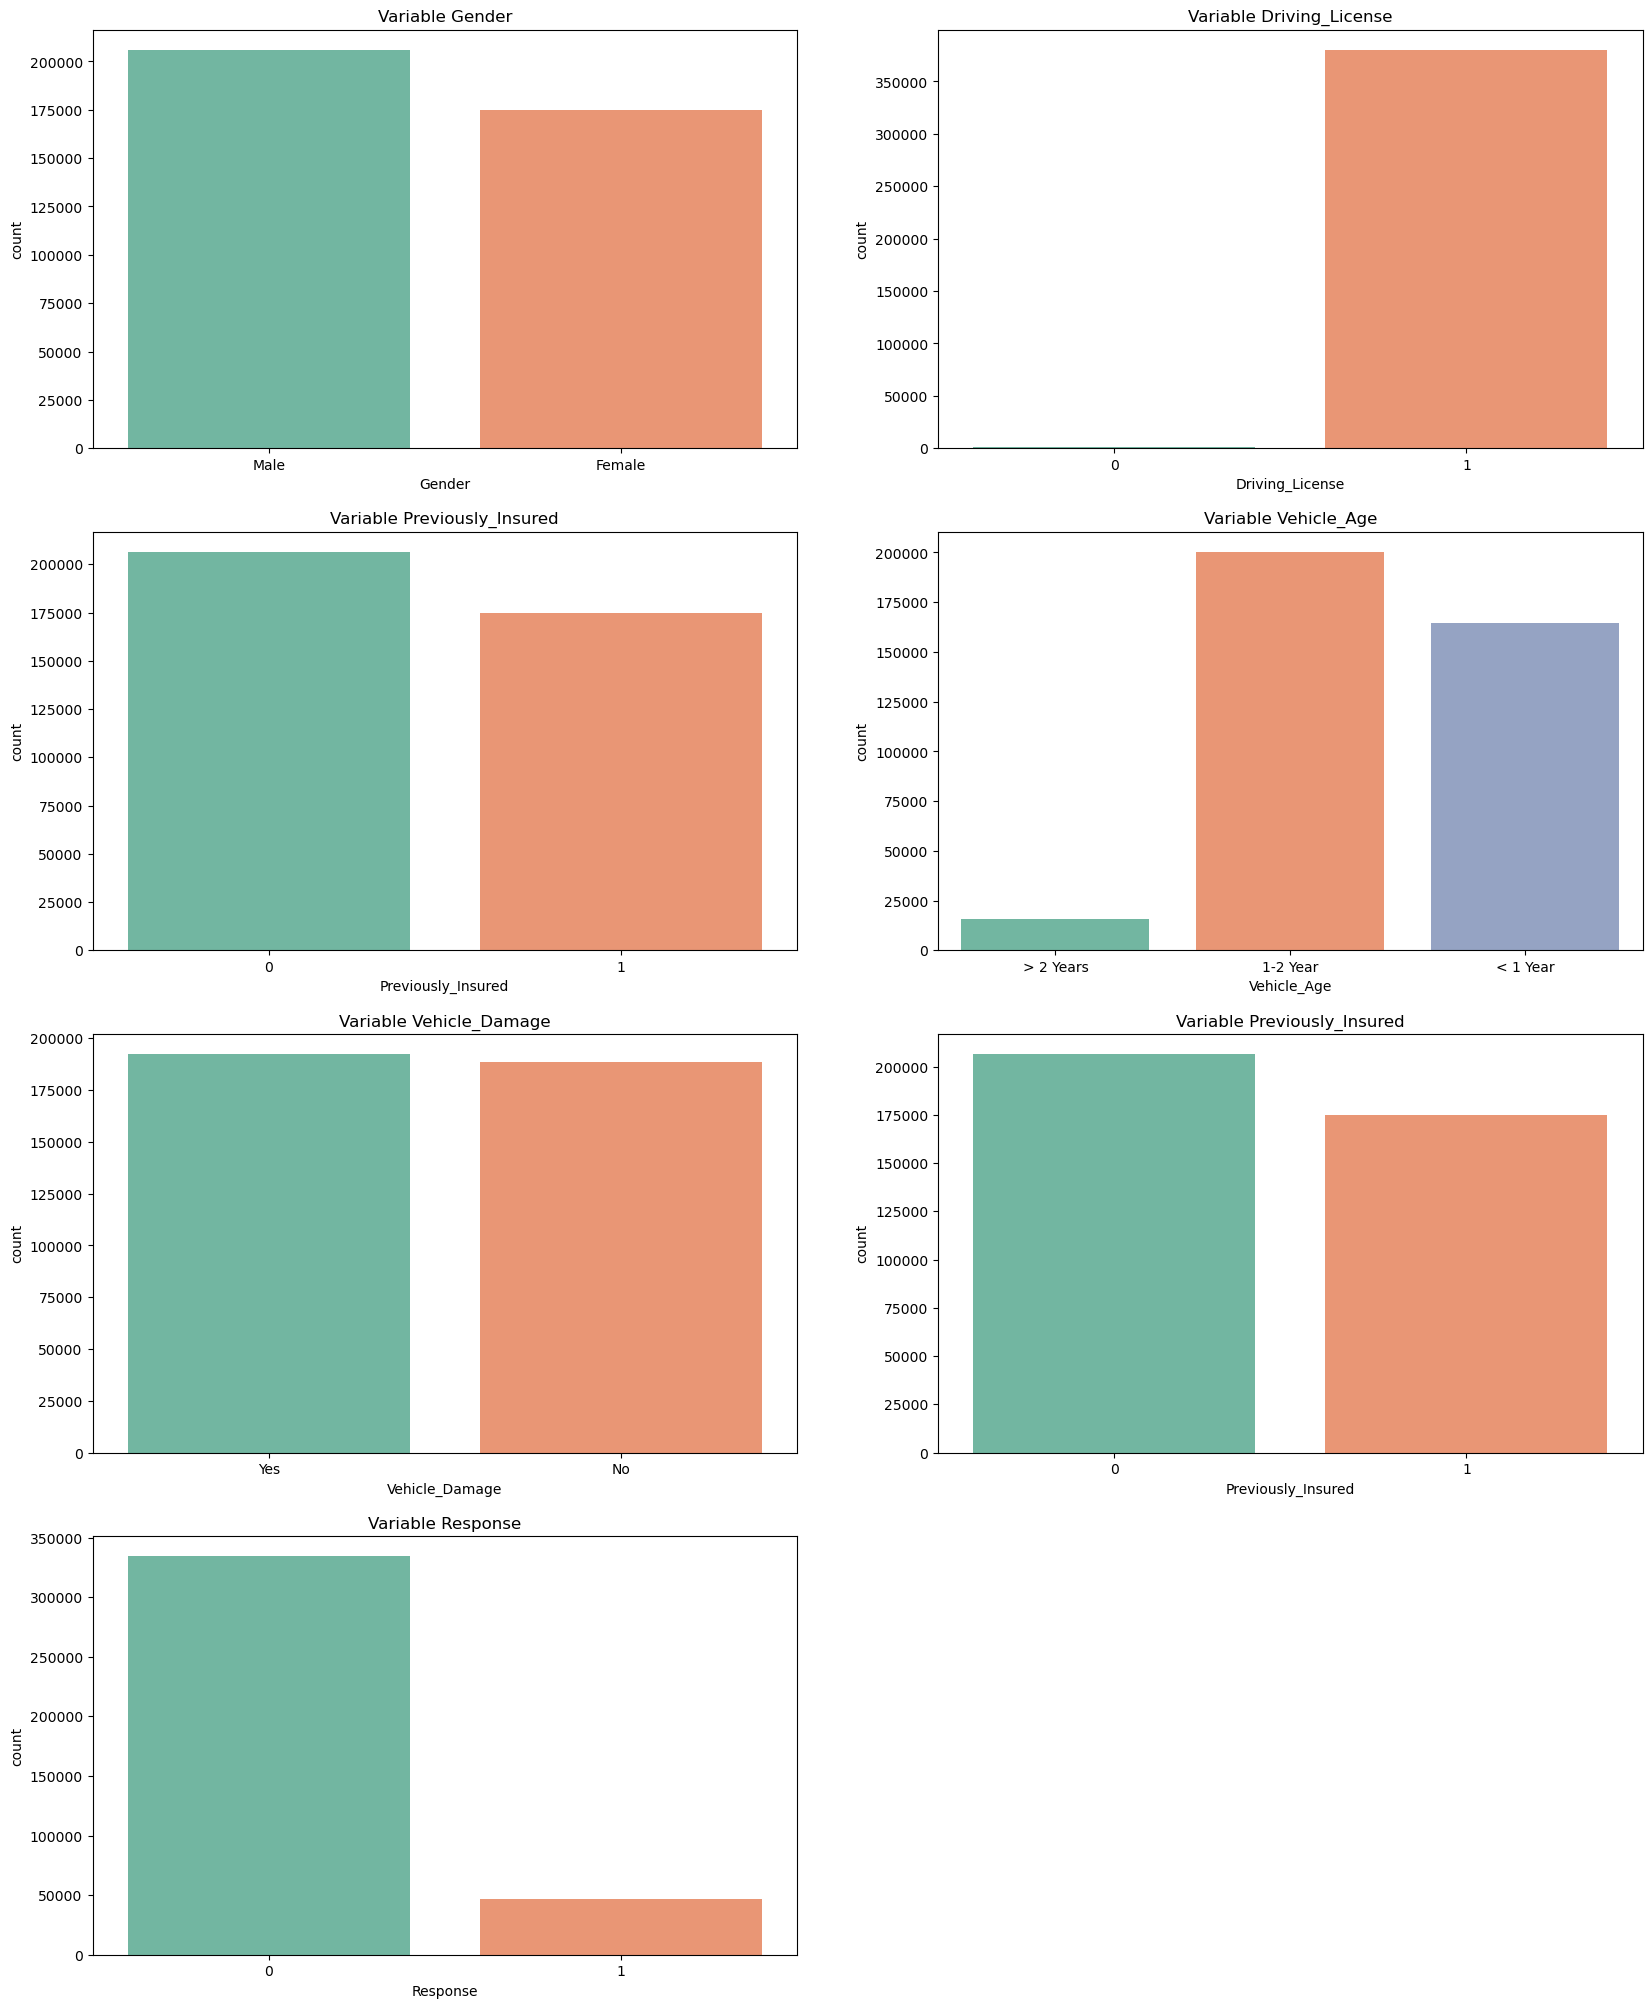

In [8]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable Driving_License')
sns.countplot(x = 'Driving_License', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable Previously_Insured')
sns.countplot(x = 'Previously_Insured', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable Vehicle_Age')
sns.countplot(x = 'Vehicle_Age', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable Vehicle_Damage')
sns.countplot(x = 'Vehicle_Damage', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable Previously_Insured')
sns.countplot(x = 'Previously_Insured', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable Response')
sns.countplot(x = 'Response', palette = 'Set2', data = df)

## Bivariate Analysis

<Axes: xlabel='Vintage', ylabel='Density'>

<Axes: xlabel='Vintage', ylabel='Density'>

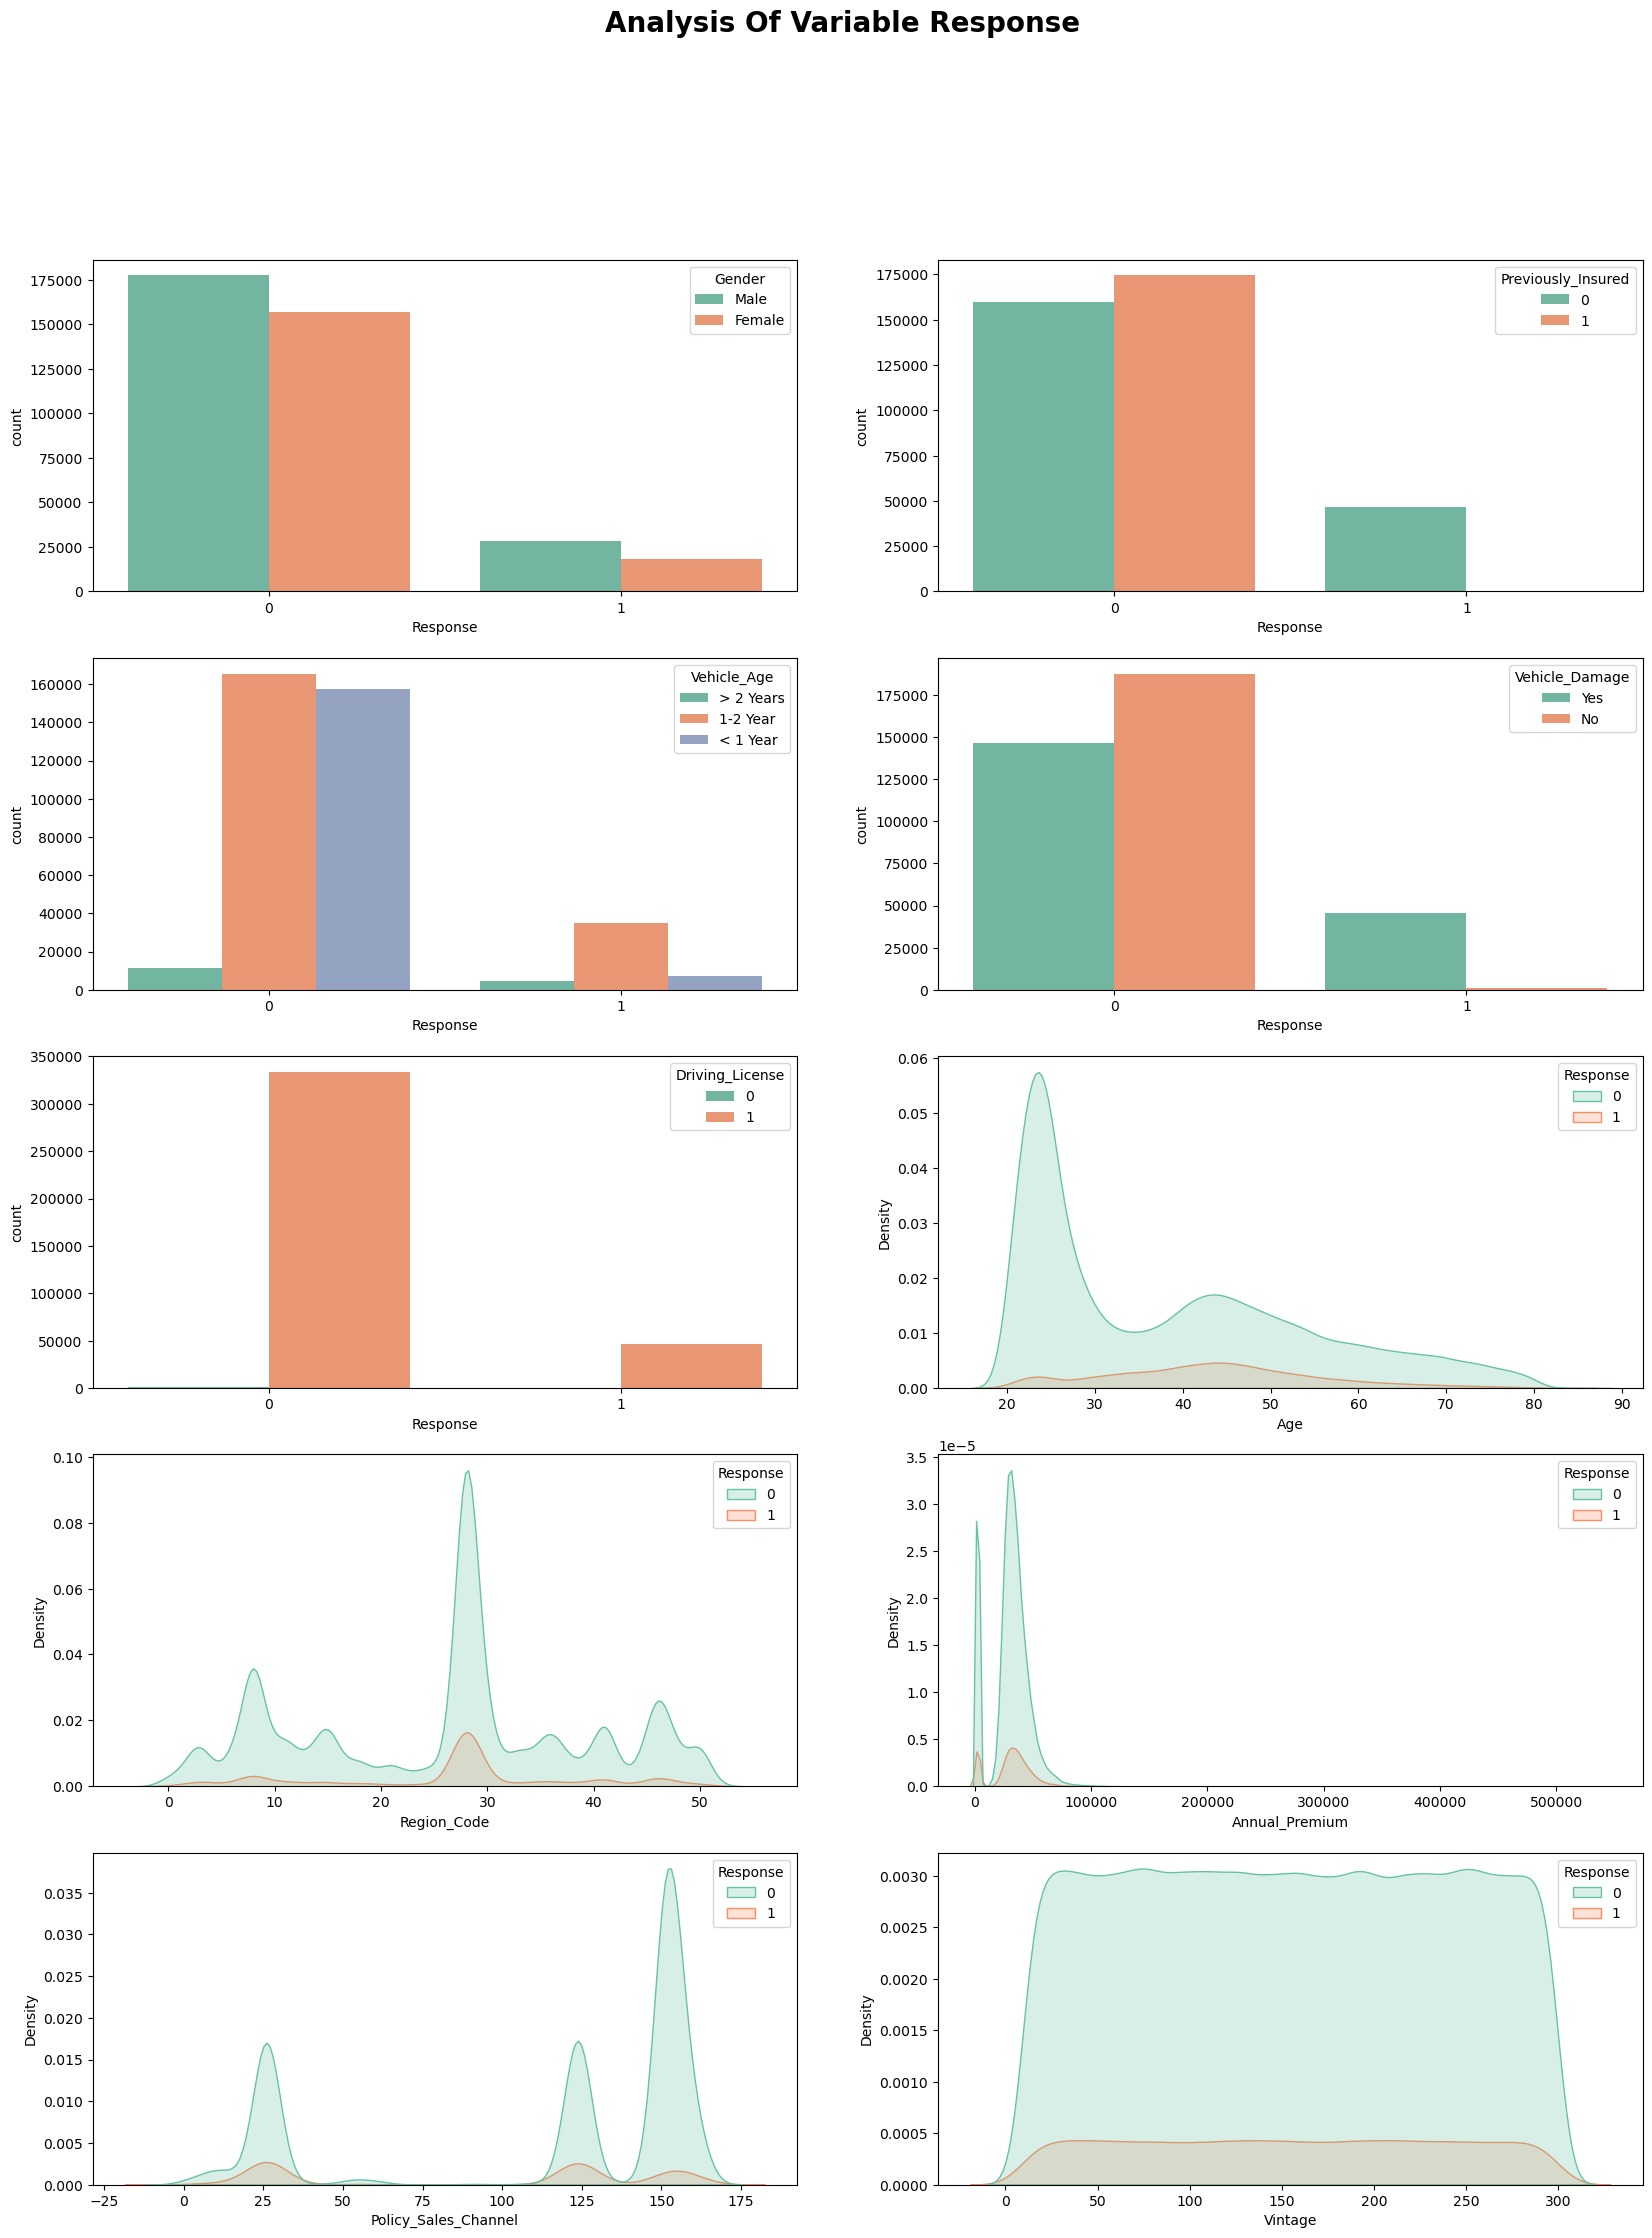

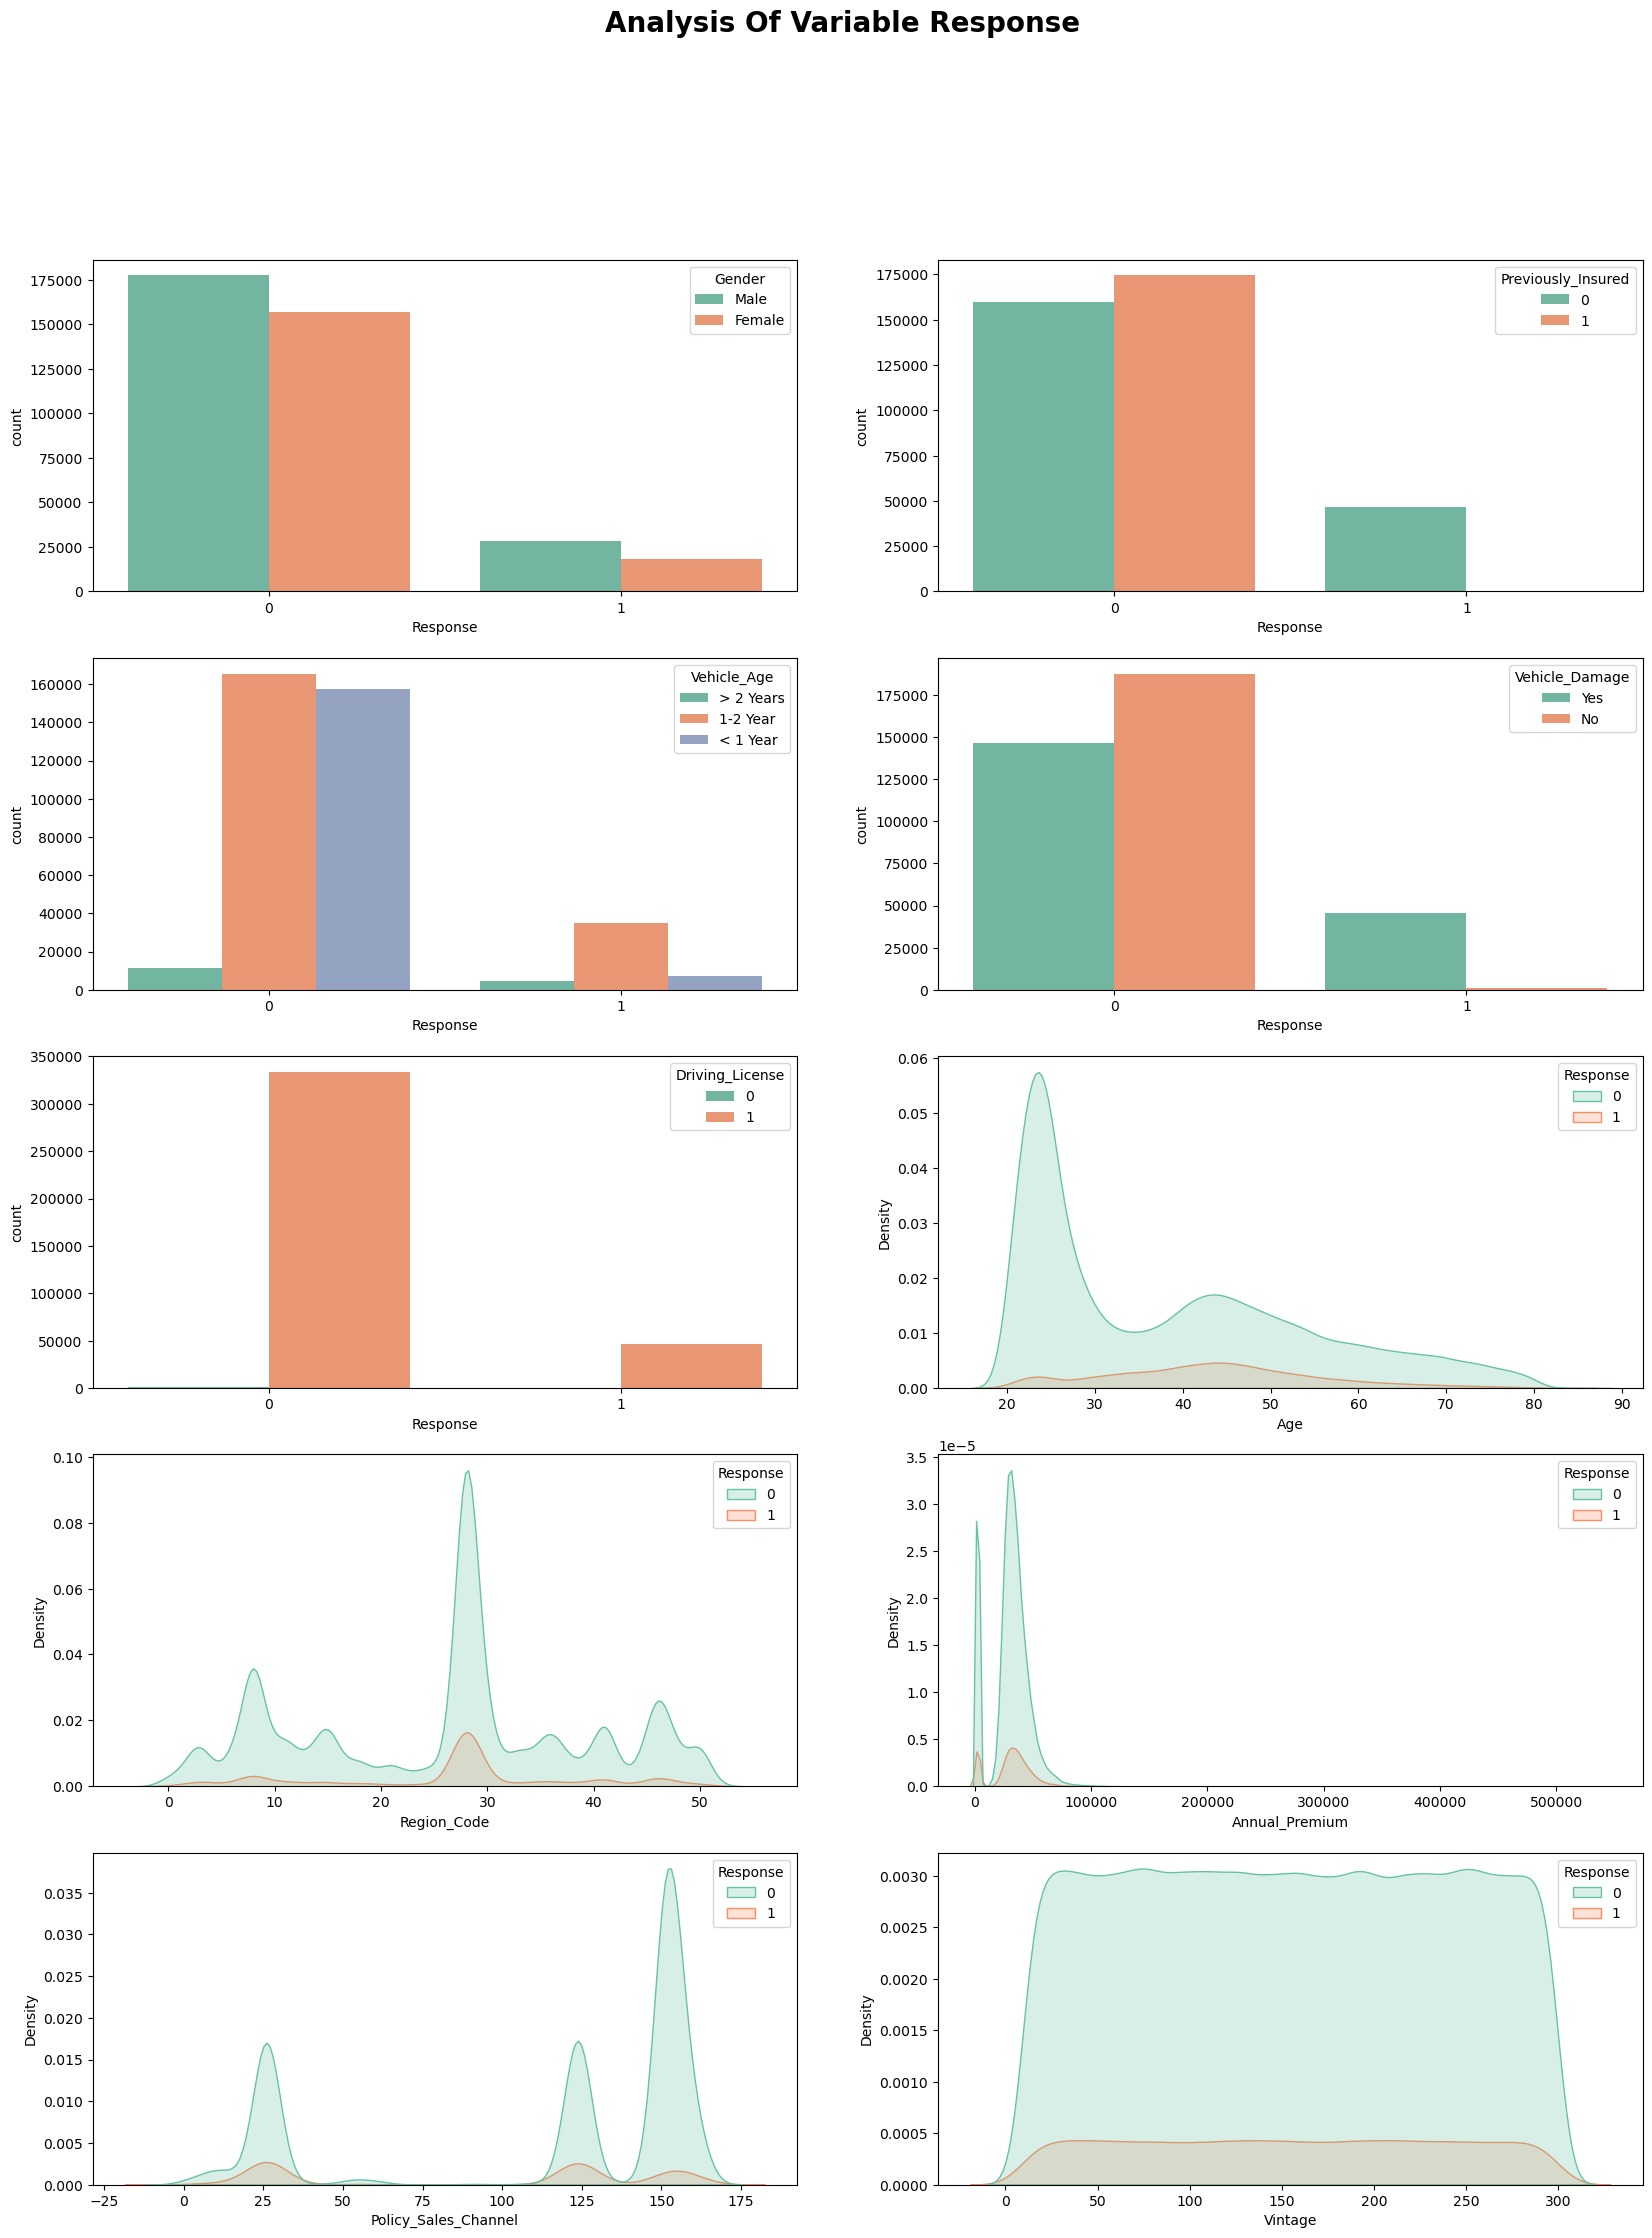

In [9]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'Response', hue = 'Gender', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Response', hue = 'Previously_Insured', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Response', hue = 'Vehicle_Age', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'Response', hue = 'Vehicle_Damage', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'Response', hue = 'Driving_License', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.kdeplot(x='Age', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='Region_Code', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,8)
sns.kdeplot(x='Annual_Premium', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,9)
sns.kdeplot(x='Policy_Sales_Channel', hue='Response', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,10)
sns.kdeplot(x='Vintage', hue='Response', palette = 'Set2', shade=True, data=df)

### From the above visualizations, we can make the following inferences.

* The male customers own slightly more vehicles and they are more tend to buy insurance in comparison to their female counterparts.

* Similarly, the customers who have driving licences will opt for insurance instead of those who don’t have it.

* The third visualization depicts that the customers want to have only an insurance policy. It means those who already have insurance won’t convert.

* In the last chart, the customers with vehicle age lesser than the 2 years are more tend to buy insurance.

* From the above plot, we can infer that if the vehicle has been damaged previously then the customer will be more interested in buying the insurance as they know the cost.

<Axes: xlabel='Vintage', ylabel='Density'>

<Axes: xlabel='Vintage', ylabel='Density'>

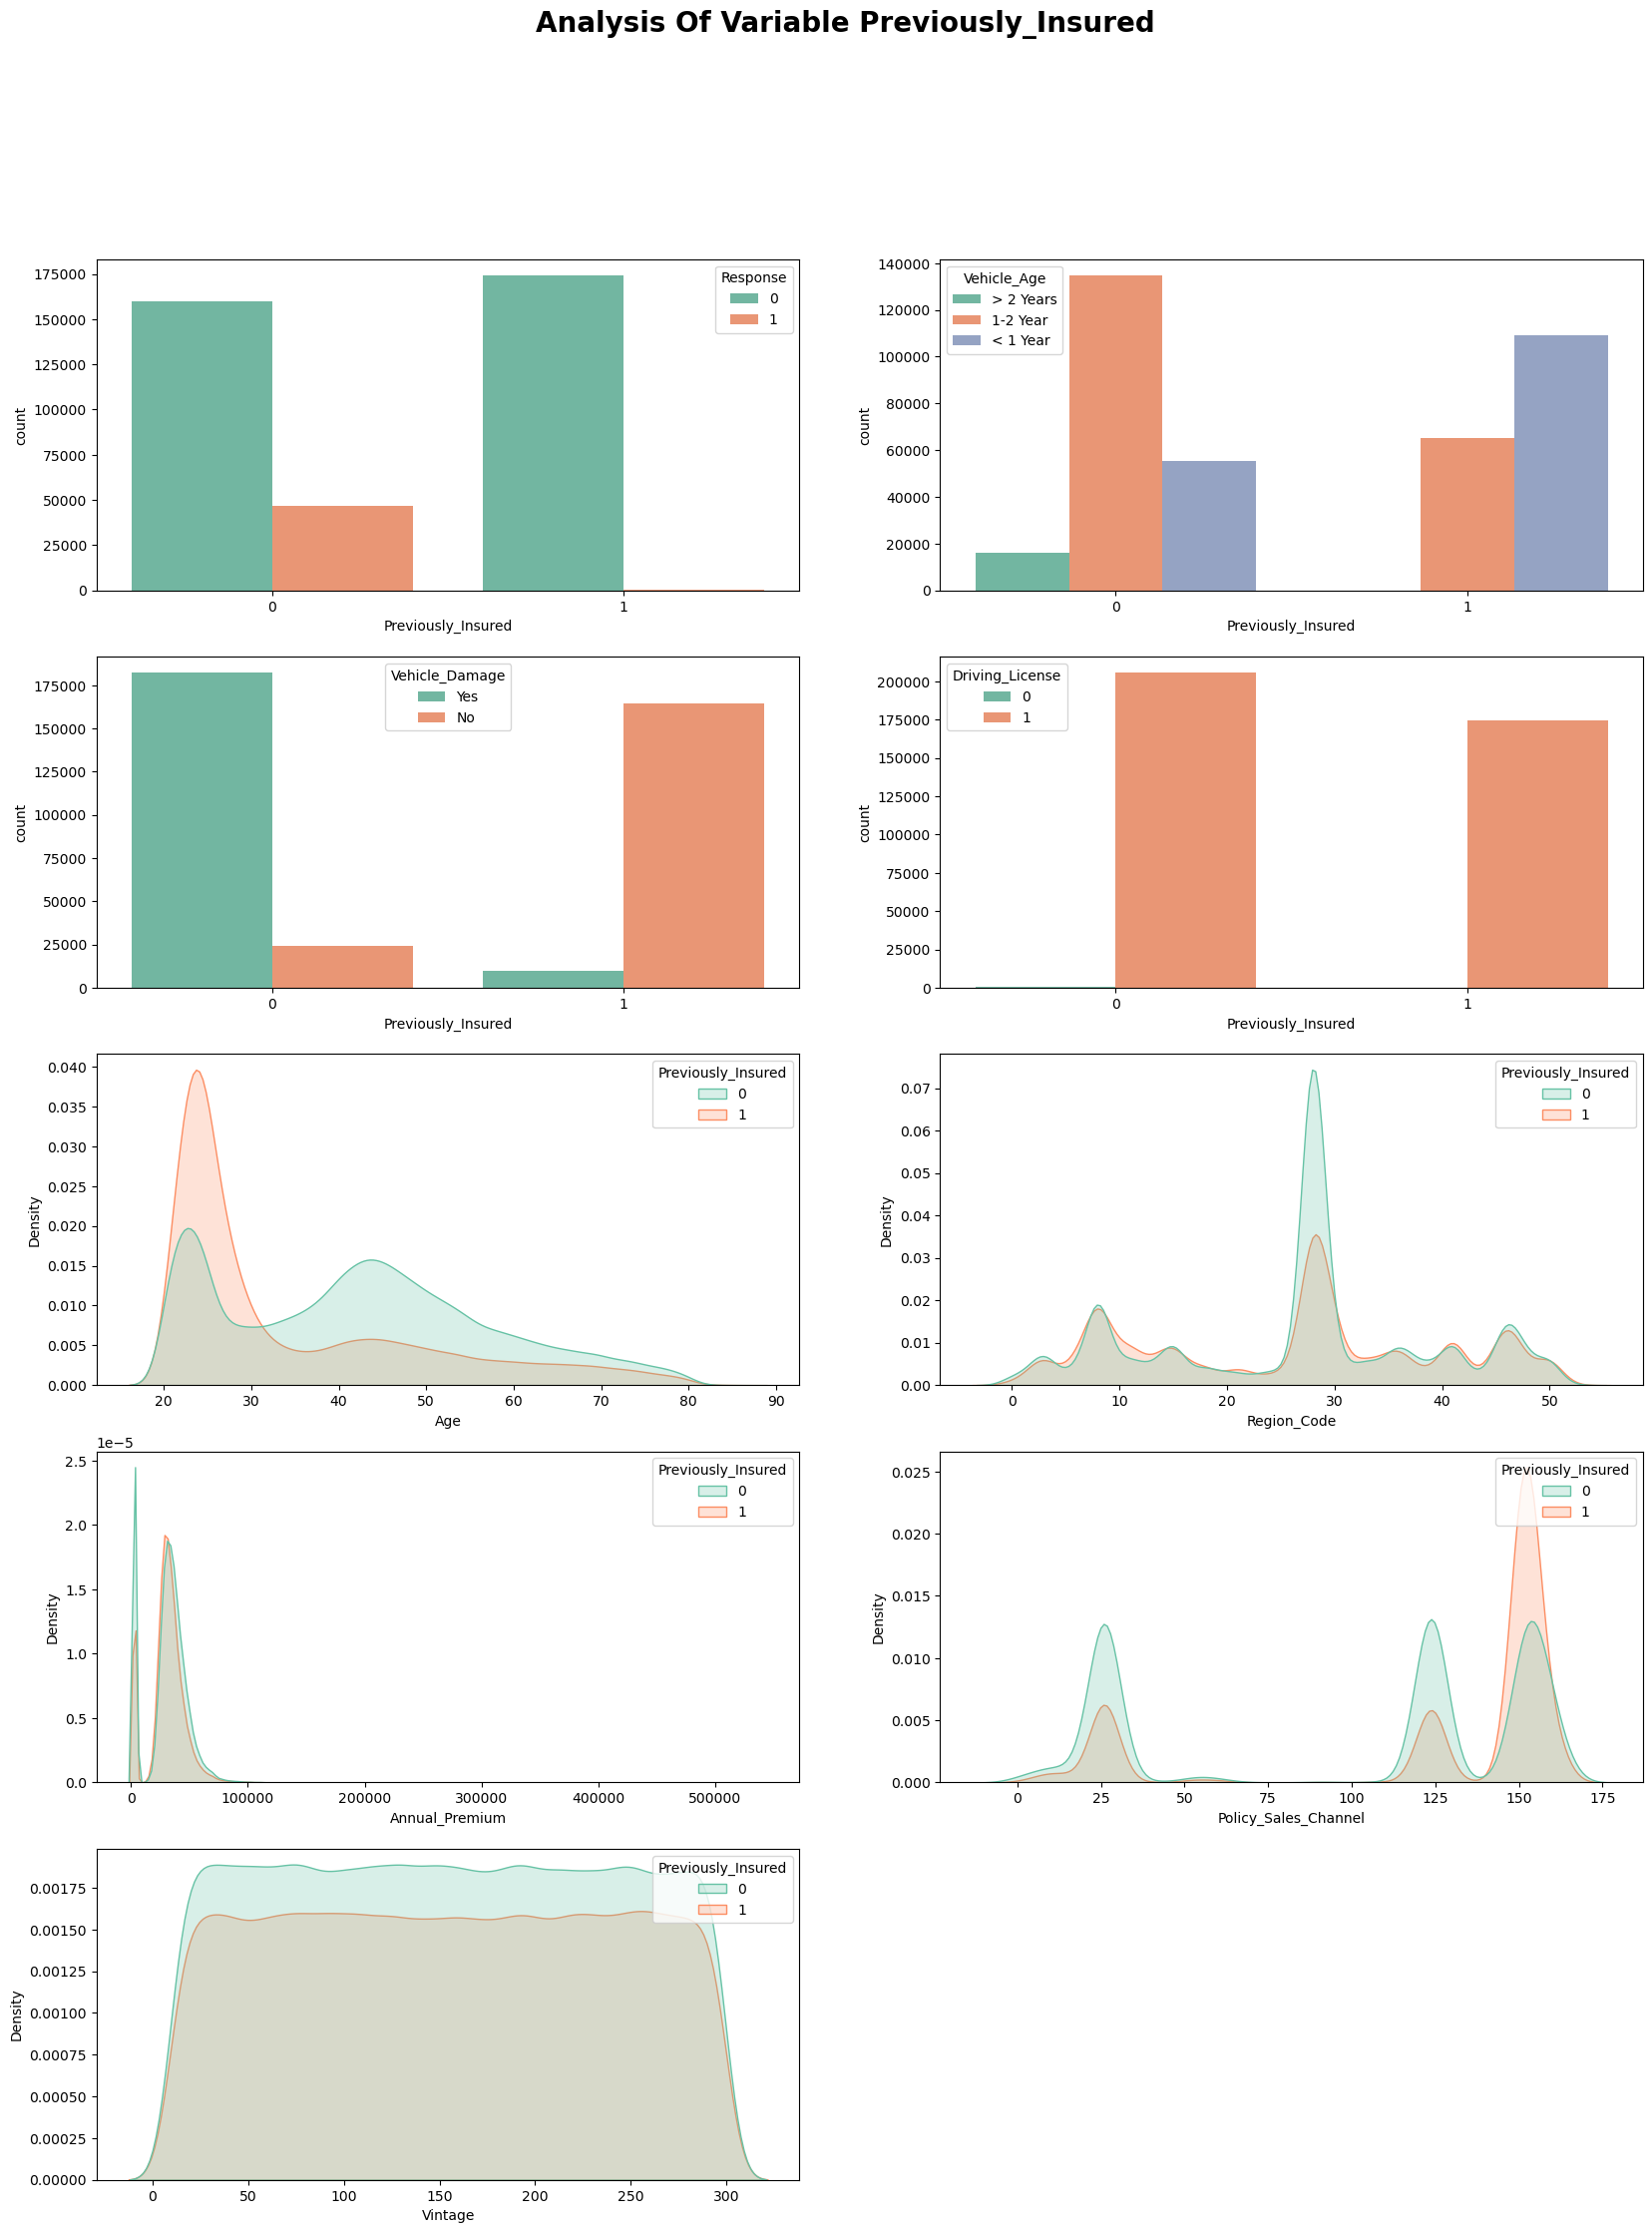

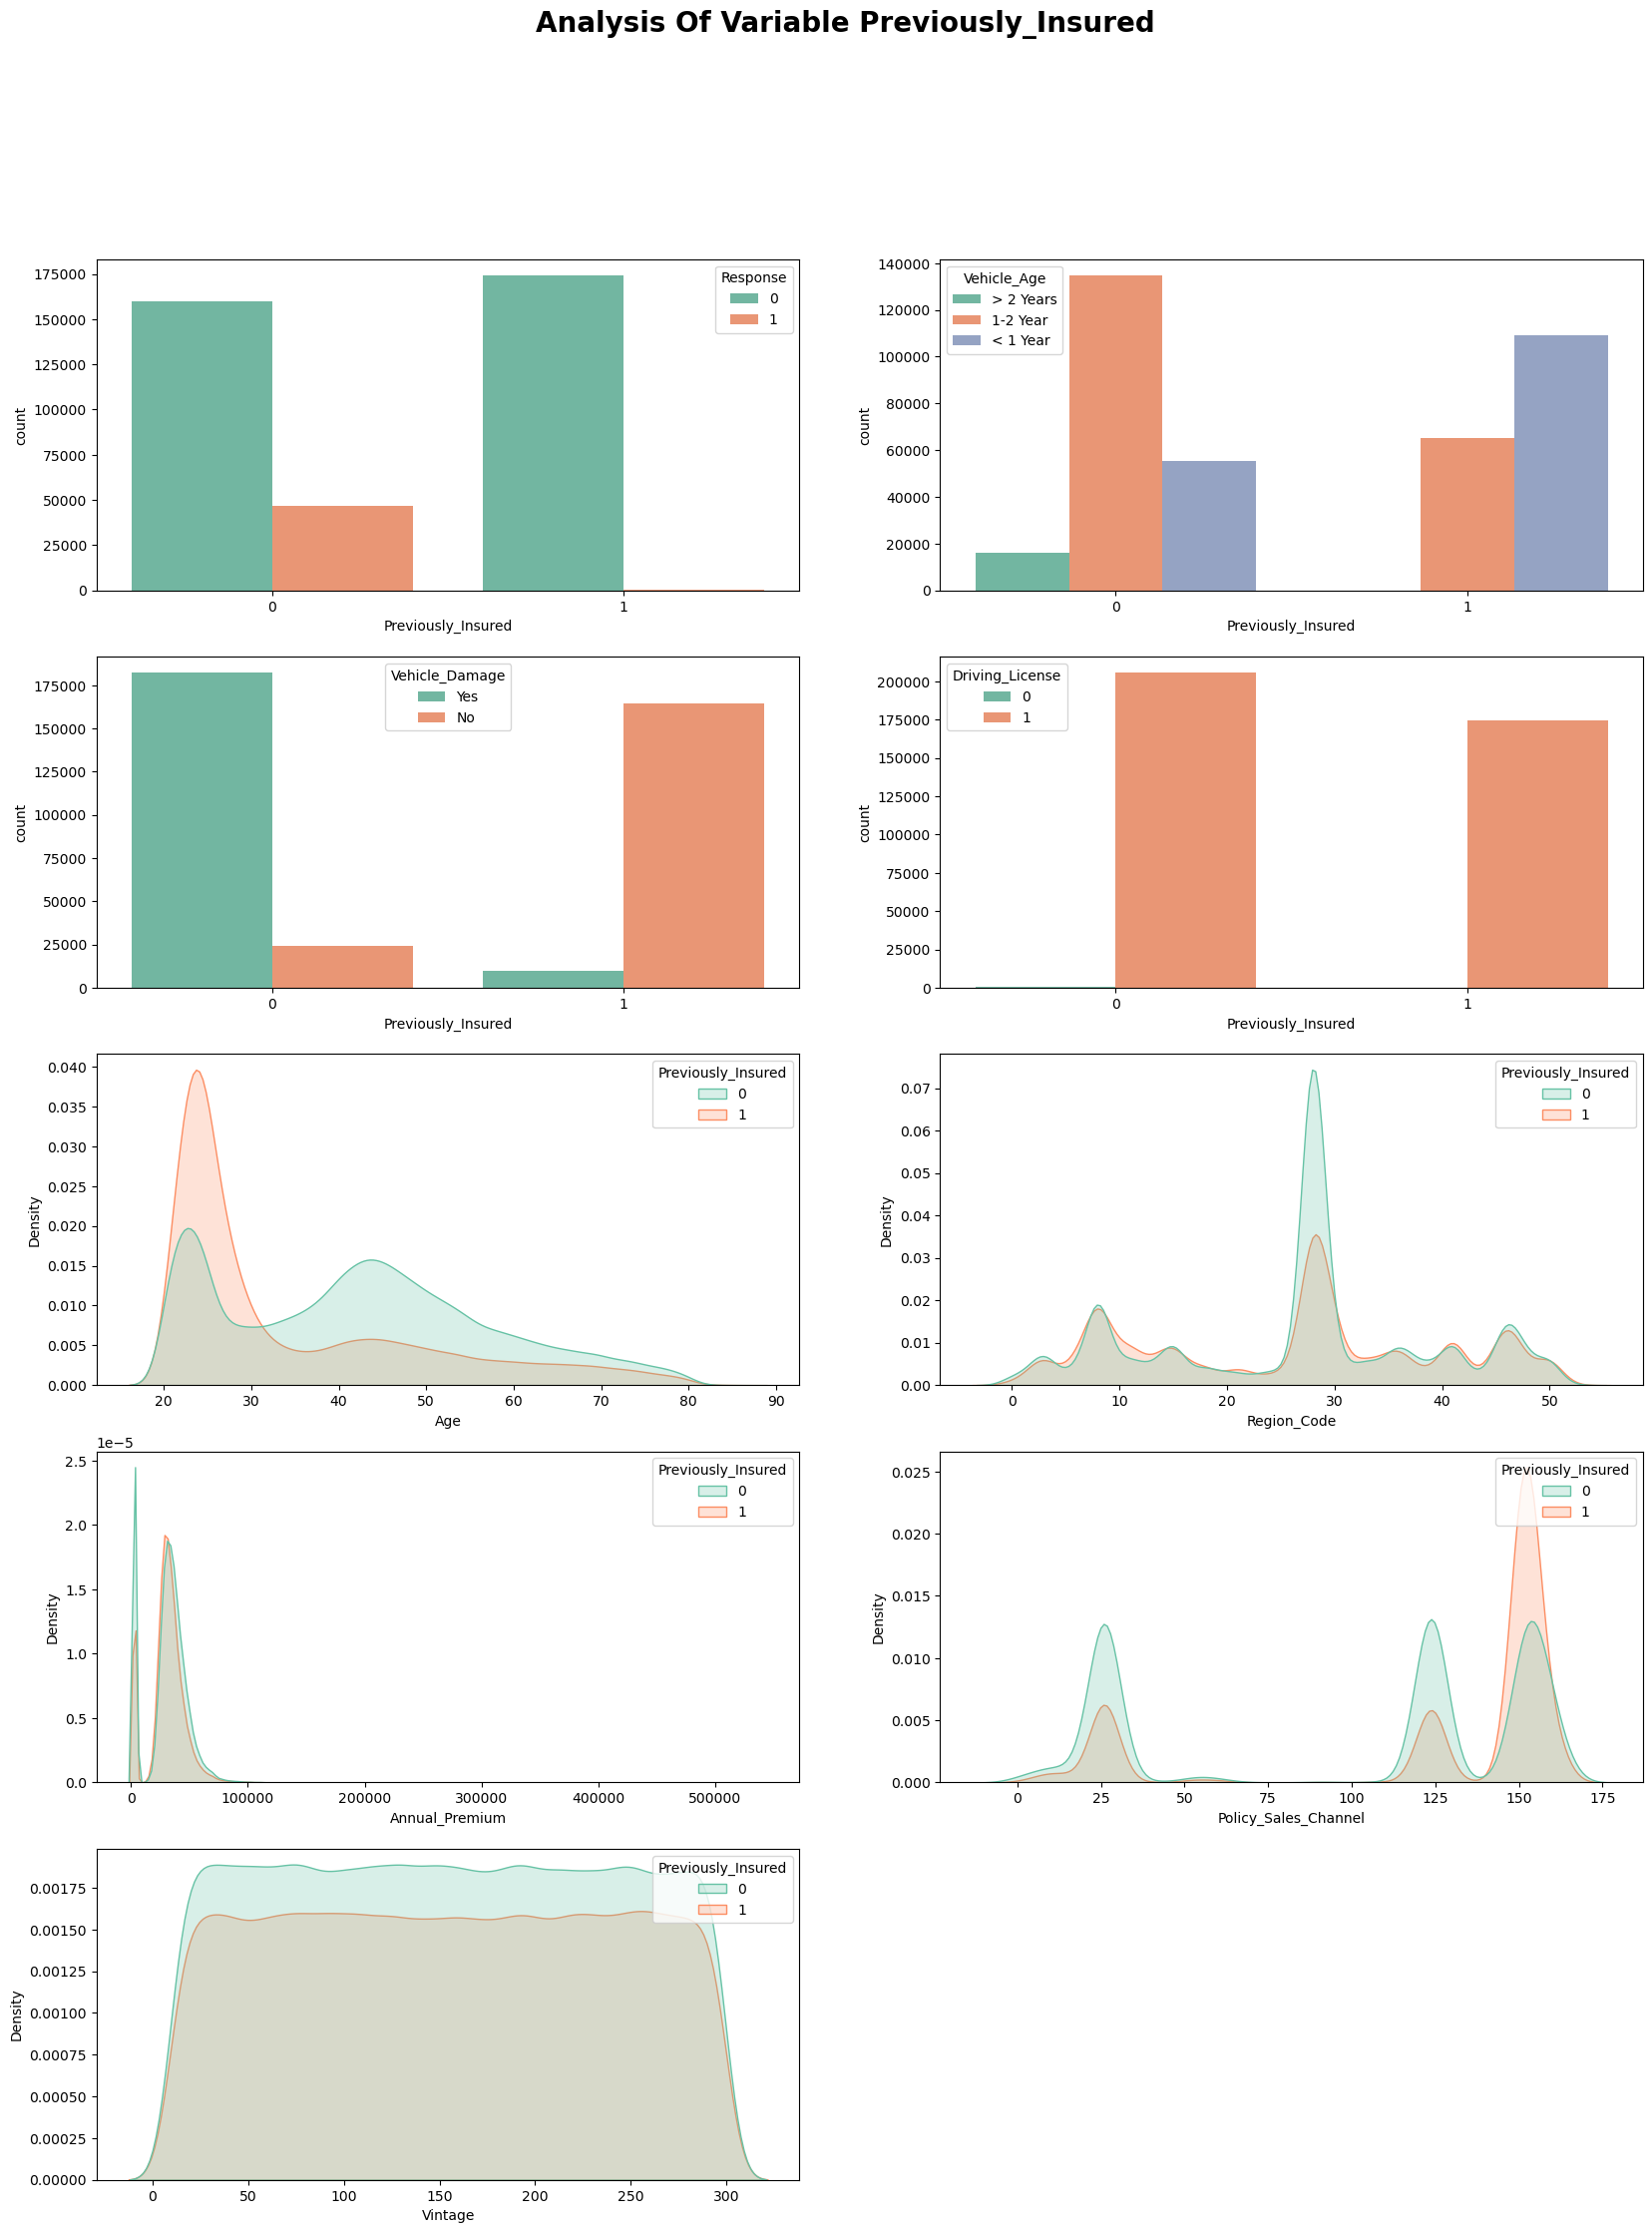

In [10]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Previously_Insured",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'Previously_Insured', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Previously_Insured', hue = 'Vehicle_Age', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Previously_Insured', hue = 'Vehicle_Damage', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'Previously_Insured', hue = 'Driving_License', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.kdeplot(x='Age', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='Region_Code', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='Annual_Premium', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,8)
sns.kdeplot(x='Policy_Sales_Channel', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,9)
sns.kdeplot(x='Vintage', hue='Previously_Insured', palette = 'Set2', shade=True, data=df)

Looking deeper into our Previously Insured variable after verifying that virtually all people who want insurance were not Previously Insured, we can see that cars older than 2 years were not Previously Insured, practically all data did not have the car damaged, when we look the peak of the age variable, we can see that we have a small difference between the yes and no values, the yes values ​​have a peak at younger ages and the no values ​​have two peaks, between the youngest age and between 40-50 years, when we look at the other variables we have practically the same distribution.

<Axes: xlabel='Age', ylabel='Count'>

<Axes: xlabel='Age', ylabel='Count'>

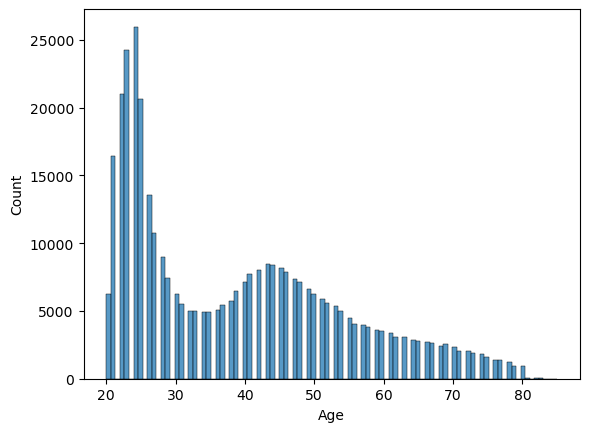

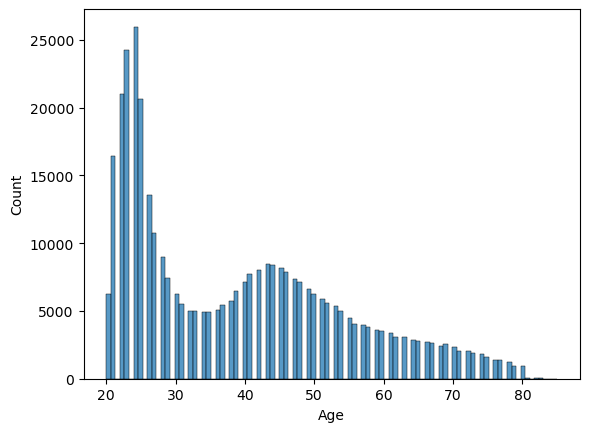

In [11]:
sns.histplot(df['Age'])

* Here, we have the distribution of the age. Most of the customers fall in the 20 to 50 age range. Similarly, we can see the distribution of annual premium

<Axes: xlabel='Annual_Premium', ylabel='Density'>

<Axes: xlabel='Annual_Premium', ylabel='Density'>

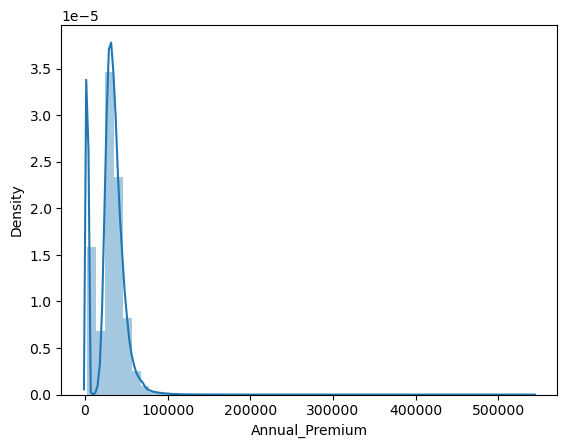

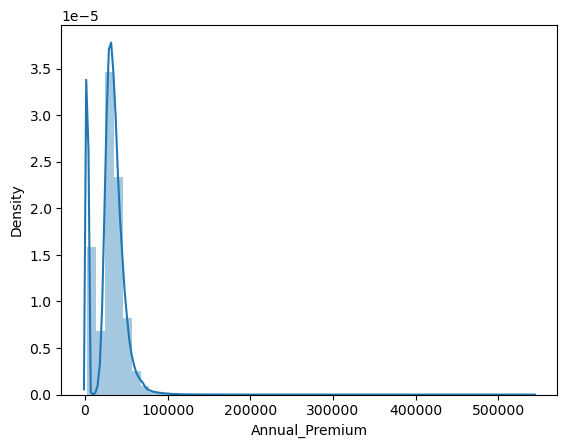

In [12]:
sns.distplot(df['Annual_Premium'])

<Axes: >

<Axes: >

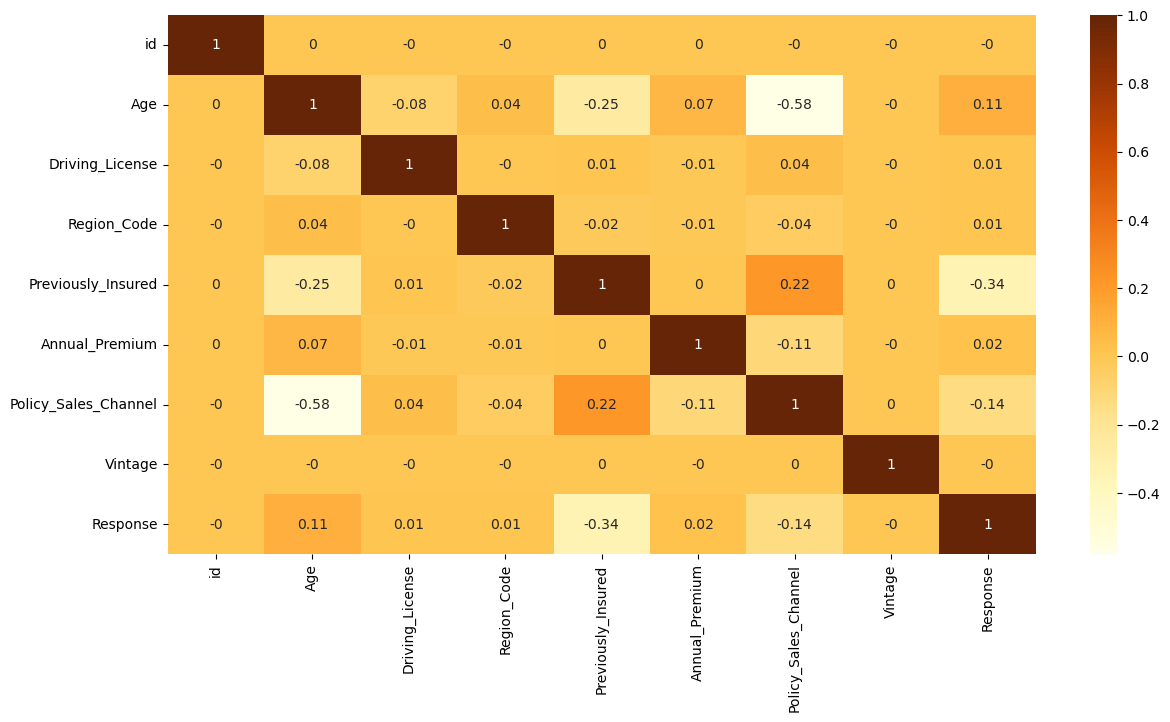

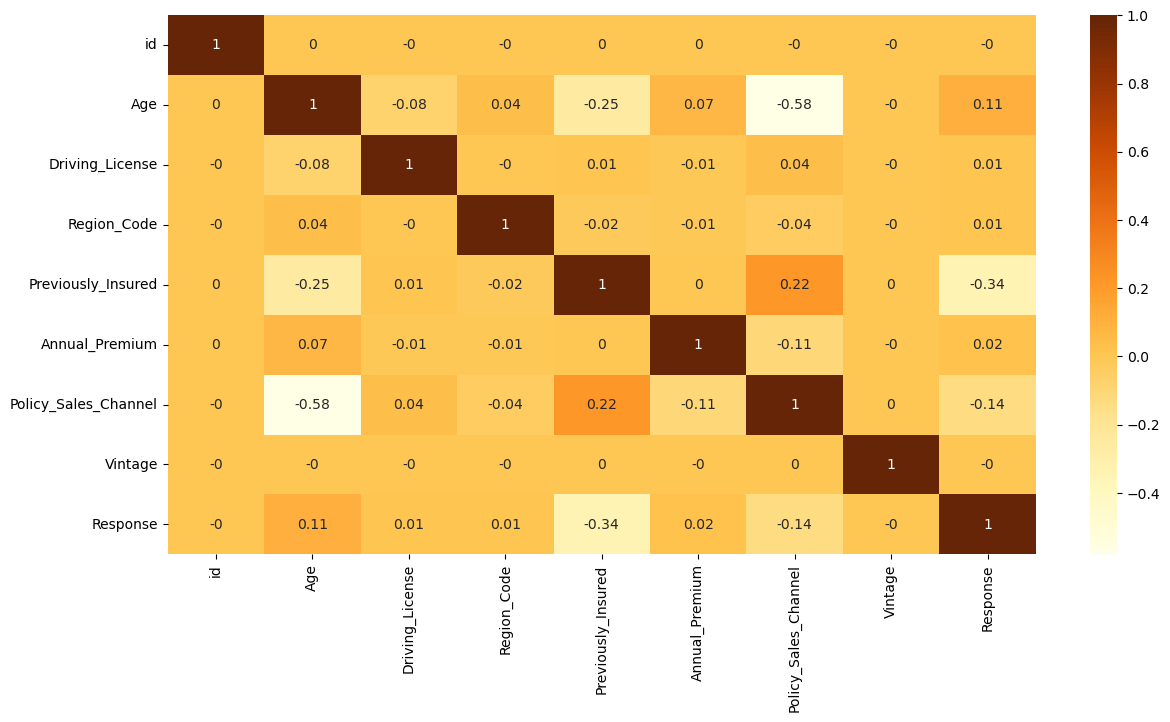

In [13]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

### We can see that we don't have strong correlation between the variables.

# Data preprocessing
The next step in the project is to prepare the data for the modelling. The following preprocessing techniques are being used here

* Convert the categorical features into dummies or doing categorical encoding.
* Binning the numerical features.
* dropping the unnecessary columns like ids.

In [14]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [15]:
df.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [16]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


#### Here we will remove the ID variable that will not be used

In [17]:
df.drop(columns=['id'],inplace=True)

In [18]:
df.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
144814,Male,33,1,10.0,0,1-2 Year,Yes,33351.0,156.0,226,1
64031,Female,27,1,16.0,0,1-2 Year,Yes,39379.0,26.0,253,0
143124,Male,47,1,9.0,0,> 2 Years,Yes,45280.0,124.0,137,0
204324,Male,34,1,30.0,0,1-2 Year,Yes,43987.0,152.0,299,0
47383,Male,58,1,41.0,0,> 2 Years,Yes,48211.0,124.0,26,1


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
144814,Male,33,1,10.0,0,1-2 Year,Yes,33351.0,156.0,226,1
64031,Female,27,1,16.0,0,1-2 Year,Yes,39379.0,26.0,253,0
143124,Male,47,1,9.0,0,> 2 Years,Yes,45280.0,124.0,137,0
204324,Male,34,1,30.0,0,1-2 Year,Yes,43987.0,152.0,299,0
47383,Male,58,1,41.0,0,> 2 Years,Yes,48211.0,124.0,26,1


In [19]:
df['Driving_License'] = df['Driving_License'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [20]:
df['Driving_License'].value_counts()

Yes    380297
No        812
Name: Driving_License, dtype: int64

Yes    380297
No        812
Name: Driving_License, dtype: int64

In [21]:
df['Previously_Insured'] = df['Previously_Insured'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [22]:
df['Previously_Insured'].value_counts()

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64

No     206481
Yes    174628
Name: Previously_Insured, dtype: int64

In [23]:
df['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [24]:
df['Vehicle_Age'].head()

0    > 2 Years
1     1-2 Year
2    > 2 Years
3     < 1 Year
4     < 1 Year
Name: Vehicle_Age, dtype: object

0    > 2 Years
1     1-2 Year
2    > 2 Years
3     < 1 Year
4     < 1 Year
Name: Vehicle_Age, dtype: object

In [25]:
df['Vehicle_Age'] = df['Vehicle_Age'].apply(lambda x: 'new' if x == '1-2 Year' else 'latest' if x== '< 1 Year'  else 'old')

In [26]:
df['Vehicle_Age'].value_counts()

new       200316
latest    164786
old        16007
Name: Vehicle_Age, dtype: int64

new       200316
latest    164786
old        16007
Name: Vehicle_Age, dtype: int64

<Axes: >

<Axes: >

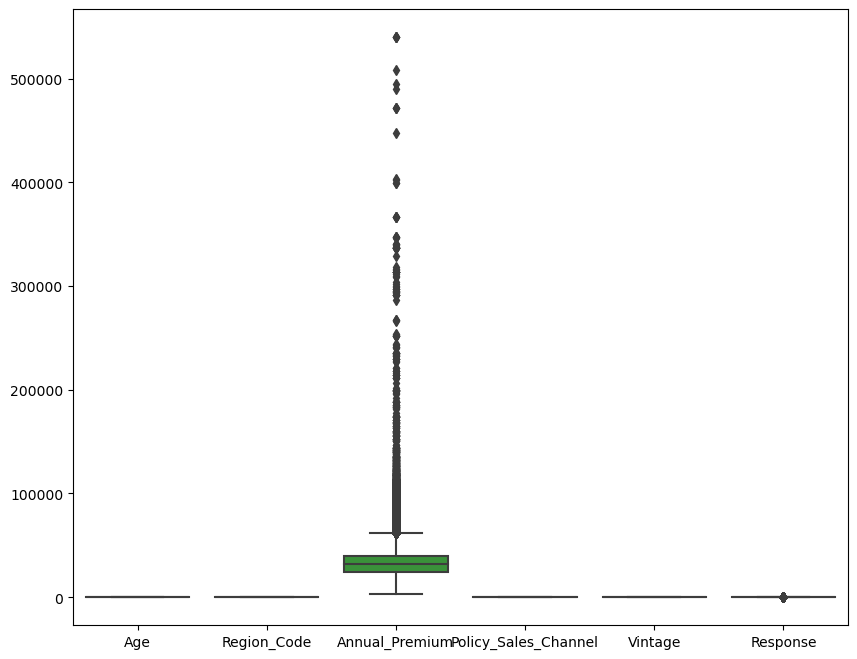

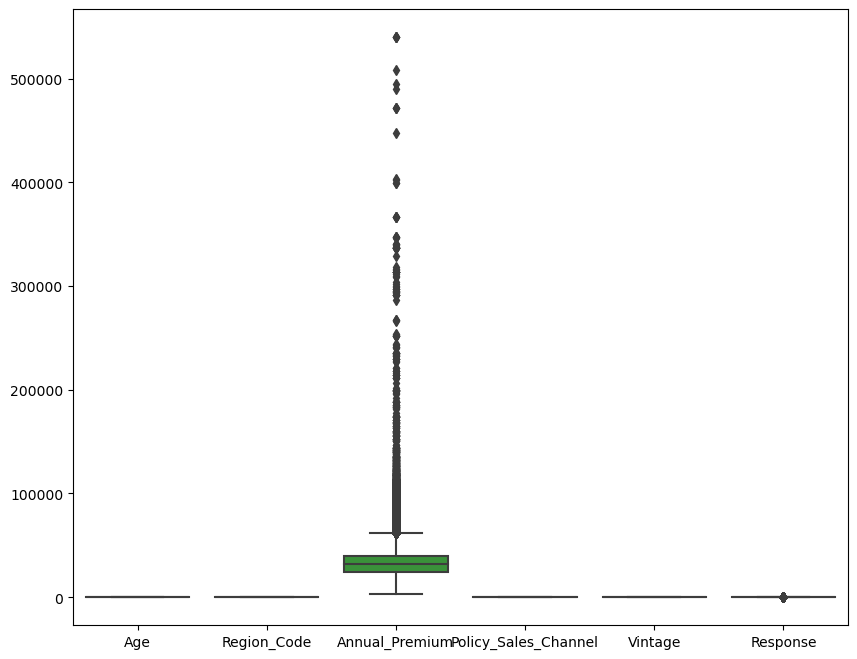

In [27]:
fig = plt.subplots(figsize=(10,8))
sns.boxplot(data=df)

* Looking at our boxplots, we can see that most of the variables do not have outliers, the only one that does is Annual Premium, for the moment we are not going to remove this data.

# Data Partition

In [28]:
X = df.drop(columns=['Response'])

In [29]:
y = df[['Response']]

### Balancing Classes
As we have many values ​​of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced

In [30]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

0    334399
1     46710
Name: Response, dtype: int64

In [31]:
from imblearn.over_sampling import RandomOverSampler

In [32]:
ros = RandomOverSampler(random_state=0)

In [33]:
X, y = ros.fit_resample(X, y)

In [34]:
print(X.shape,y.shape)

(668798, 10) (668798, 1)
(668798, 10) (668798, 1)


In [35]:
y.value_counts()

Response
0           334399
1           334399
dtype: int64

Response
0           334399
1           334399
dtype: int64

### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Model building

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Numeric Columns

In [38]:
X[X.select_dtypes(include='number').columns.tolist()]

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,40454.0,26.0,217
1,76,3.0,33536.0,26.0,183
2,47,28.0,38294.0,26.0,27
3,21,11.0,28619.0,152.0,203
4,29,41.0,27496.0,152.0,39
...,...,...,...,...,...
668793,49,28.0,38680.0,124.0,193
668794,55,41.0,35745.0,124.0,40
668795,33,46.0,23863.0,124.0,84
668796,25,29.0,41620.0,26.0,234


,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,28.0,40454.0,26.0,217
1,76,3.0,33536.0,26.0,183
2,47,28.0,38294.0,26.0,27
3,21,11.0,28619.0,152.0,203
4,29,41.0,27496.0,152.0,39
...,...,...,...,...,...
668793,49,28.0,38680.0,124.0,193
668794,55,41.0,35745.0,124.0,40
668795,33,46.0,23863.0,124.0,84
668796,25,29.0,41620.0,26.0,234


###  Categorical Columns

In [39]:
X[X.select_dtypes(include='object').columns.tolist()]

,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,Male,Yes,No,old,Yes
1,Male,Yes,No,new,No
2,Male,Yes,No,old,Yes
3,Male,Yes,Yes,latest,No
4,Female,Yes,Yes,latest,No
...,...,...,...,...,...
668793,Male,Yes,No,new,Yes
668794,Male,Yes,No,new,Yes
668795,Male,Yes,No,new,Yes
668796,Male,Yes,No,new,Yes


,Gender,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage
0,Male,Yes,No,old,Yes
1,Male,Yes,No,new,No
2,Male,Yes,No,old,Yes
3,Male,Yes,Yes,latest,No
4,Female,Yes,Yes,latest,No
...,...,...,...,...,...
668793,Male,Yes,No,new,Yes
668794,Male,Yes,No,new,Yes
668795,Male,Yes,No,new,Yes
668796,Male,Yes,No,new,Yes


# Creating pipeline with column transformer

*Encode categorical features as a one-hot numeric array. <br>
*Scaling features with StandardScaler so that the mean of the features becomes zero and the standard deviation becomes one. 

# Logistic Regression 

### column transformer without selector

In [40]:
numeric_features = ["Age",'Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_features = ["Gender", "Driving_License" , 'Previously_Insured' ,"Vehicle_Age", "Vehicle_Damage"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [41]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.782
model score: 0.782


In [43]:
output = clf.predict(X_test)

In [44]:
print(classification_report(output,y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     41473
           1       0.97      0.70      0.82     92287

    accuracy                           0.78    133760
   macro avg       0.78      0.83      0.77    133760
weighted avg       0.85      0.78      0.79    133760

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     41473
           1       0.97      0.70      0.82     92287

    accuracy                           0.78    133760
   macro avg       0.78      0.83      0.77    133760
weighted avg       0.85      0.78      0.79    133760



### column transformer with selector

In [45]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(random_state = 1, max_iter=1000))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     41474
           1       0.97      0.70      0.82     92286

    accuracy                           0.78    133760
   macro avg       0.78      0.83      0.77    133760
weighted avg       0.85      0.78      0.79    133760

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     41474
           1       0.97      0.70      0.82     92286

    accuracy                           0.78    133760
   macro avg       0.78      0.83      0.77    133760
weighted avg       0.85      0.78      0.79    133760



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADC4857790>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADC4855FF0>)])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=1))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADC4857790>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADC4855FF0>)])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=1))])

# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [50]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  KNeighborsClassifier(n_neighbors=3))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     54427
           1       0.99      0.83      0.91     79333

    accuracy                           0.90    133760
   macro avg       0.90      0.91      0.90    133760
weighted avg       0.92      0.90      0.90    133760

              precision    recall  f1-score   support

           0       0.80      0.99      0.89     54427
           1       0.99      0.83      0.91     79333

    accuracy                           0.90    133760
   macro avg       0.90      0.91      0.90    133760
weighted avg       0.92      0.90      0.90    133760



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADCFDC4880>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADCFE51690>)])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADCFDC4880>),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001ADCFE51690>)])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [51]:
score_kNN = 0.90

#### Now we have a great model, although the model is much better at predicting positive values, it ended up improving a lot at predicting negative values, we had almost 90% accuracy.

## Pickling

In [52]:
import pickle

In [53]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,Yes,28.0,No,old,Yes,40454.0,26.0,217,1
1,Male,76,Yes,3.0,No,new,No,33536.0,26.0,183,0
2,Male,47,Yes,28.0,No,old,Yes,38294.0,26.0,27,1
3,Male,21,Yes,11.0,Yes,latest,No,28619.0,152.0,203,0
4,Female,29,Yes,41.0,Yes,latest,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,Yes,26.0,Yes,new,No,30170.0,26.0,88,0
381105,Male,30,Yes,37.0,Yes,latest,No,40016.0,152.0,131,0
381106,Male,21,Yes,30.0,Yes,latest,No,35118.0,160.0,161,0
381107,Female,68,Yes,14.0,No,old,Yes,44617.0,124.0,74,0


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,Yes,28.0,No,old,Yes,40454.0,26.0,217,1
1,Male,76,Yes,3.0,No,new,No,33536.0,26.0,183,0
2,Male,47,Yes,28.0,No,old,Yes,38294.0,26.0,27,1
3,Male,21,Yes,11.0,Yes,latest,No,28619.0,152.0,203,0
4,Female,29,Yes,41.0,Yes,latest,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,Yes,26.0,Yes,new,No,30170.0,26.0,88,0
381105,Male,30,Yes,37.0,Yes,latest,No,40016.0,152.0,131,0
381106,Male,21,Yes,30.0,Yes,latest,No,35118.0,160.0,161,0
381107,Female,68,Yes,14.0,No,old,Yes,44617.0,124.0,74,0


In [54]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

# Joblib

In [55]:
import joblib

In [56]:
joblib.dump(clf,'model_health_insurance')

['model_health_insurance']

['model_health_insurance']

### Applying model on test dataset

In [57]:
df1 =pd.read_csv('test.csv')
df1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [58]:
df1.drop(columns=['id'],inplace=True)

In [59]:
model = joblib.load('model_health_insurance')

In [60]:
df1['Driving_License'] = df1['Driving_License'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [61]:
df1['Previously_Insured'] = df1['Previously_Insured'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [62]:
df1['Vehicle_Age'] = df1['Vehicle_Age'].apply(lambda x: 'new' if x == '1-2 Year' else 'latest' if x== '< 1 Year'  else 'old')

In [63]:
output = model.predict(df1)

In [64]:
df2 = pd.DataFrame(output,columns = ['Prediction'])
df2

,Prediction
0,0
1,1
2,0
3,0
4,0
...,...
127032,0
127033,0
127034,0
127035,0


,Prediction
0,0
1,1
2,0
3,0
4,0
...,...
127032,0
127033,0
127034,0
127035,0


In [65]:
df2['Prediction'].value_counts()

0    96909
1    30128
Name: Prediction, dtype: int64

0    96909
1    30128
Name: Prediction, dtype: int64

In [66]:
df3 = pd.concat([df1,df2],axis=1)

In [67]:
df3.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Prediction
10115,Male,52,Yes,28.0,Yes,new,No,25332.0,24.0,139,0
65814,Male,23,Yes,12.0,Yes,latest,No,21854.0,160.0,103,0
20428,Female,25,Yes,41.0,Yes,latest,No,23978.0,26.0,80,0
68587,Male,38,Yes,29.0,No,new,Yes,39136.0,26.0,30,1
42921,Female,40,Yes,46.0,No,new,Yes,30071.0,26.0,291,1


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Prediction
10115,Male,52,Yes,28.0,Yes,new,No,25332.0,24.0,139,0
65814,Male,23,Yes,12.0,Yes,latest,No,21854.0,160.0,103,0
20428,Female,25,Yes,41.0,Yes,latest,No,23978.0,26.0,80,0
68587,Male,38,Yes,29.0,No,new,Yes,39136.0,26.0,30,1
42921,Female,40,Yes,46.0,No,new,Yes,30071.0,26.0,291,1


In [68]:
df_Predicted = df3.loc[df3['Prediction'] == 1]

In [69]:
df_Predicted

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Prediction
1,Male,40,Yes,28.0,No,new,Yes,33762.0,7.0,111,1
13,Male,47,Yes,3.0,No,new,Yes,28739.0,124.0,22,1
14,Female,55,Yes,48.0,No,new,Yes,2630.0,124.0,169,1
17,Male,41,Yes,10.0,No,new,Yes,15006.0,124.0,141,1
35,Male,27,Yes,33.0,No,new,Yes,28010.0,26.0,273,1
...,...,...,...,...,...,...,...,...,...,...,...
127005,Male,59,Yes,28.0,No,old,Yes,50074.0,26.0,168,1
127006,Female,41,Yes,40.0,No,new,Yes,30501.0,124.0,265,1
127013,Male,47,Yes,29.0,No,new,Yes,52304.0,26.0,83,1
127018,Male,52,Yes,28.0,No,old,Yes,36768.0,26.0,87,1


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Prediction
1,Male,40,Yes,28.0,No,new,Yes,33762.0,7.0,111,1
13,Male,47,Yes,3.0,No,new,Yes,28739.0,124.0,22,1
14,Female,55,Yes,48.0,No,new,Yes,2630.0,124.0,169,1
17,Male,41,Yes,10.0,No,new,Yes,15006.0,124.0,141,1
35,Male,27,Yes,33.0,No,new,Yes,28010.0,26.0,273,1
...,...,...,...,...,...,...,...,...,...,...,...
127005,Male,59,Yes,28.0,No,old,Yes,50074.0,26.0,168,1
127006,Female,41,Yes,40.0,No,new,Yes,30501.0,124.0,265,1
127013,Male,47,Yes,29.0,No,new,Yes,52304.0,26.0,83,1
127018,Male,52,Yes,28.0,No,old,Yes,36768.0,26.0,87,1


In [70]:
df_Predicted =df_Predicted.reset_index(drop=True)

In [71]:
df_Predicted.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Prediction
0,Male,40,Yes,28.0,No,new,Yes,33762.0,7.0,111,1
1,Male,47,Yes,3.0,No,new,Yes,28739.0,124.0,22,1
2,Female,55,Yes,48.0,No,new,Yes,2630.0,124.0,169,1
3,Male,41,Yes,10.0,No,new,Yes,15006.0,124.0,141,1
4,Male,27,Yes,33.0,No,new,Yes,28010.0,26.0,273,1


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Prediction
0,Male,40,Yes,28.0,No,new,Yes,33762.0,7.0,111,1
1,Male,47,Yes,3.0,No,new,Yes,28739.0,124.0,22,1
2,Female,55,Yes,48.0,No,new,Yes,2630.0,124.0,169,1
3,Male,41,Yes,10.0,No,new,Yes,15006.0,124.0,141,1
4,Male,27,Yes,33.0,No,new,Yes,28010.0,26.0,273,1


In [72]:
df_Predicted.to_csv('Prediction_on_test_by_Knn.csv')

# SVM

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(kernel='linear'))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

In [ ]:
# Define Model parameters to tune
model_parameters = {
        'kernel':['linear'], # calculation
        'C':[1, 10], #cost complexity or penalty 
        'gamma': [0.0001]
    }

In [ ]:
# Gridsearch the parameters to find the best parameters. 
model = SVC(probability=True)  # Support vector classifier 

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5,  # times 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)

In [ ]:
print('The best parameter are -', gscv.best_params_)

In [ ]:
score_SVM = 0.90

# Decision Tree

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  DecisionTreeClassifier(max_depth=8))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

# Grid Search Method

In [ ]:
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import GridSearchCV

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first'), selector(dtype_exclude="number")),])

params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=10)


clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", grid_search_cv)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(max_depth=6, min_samples_leaf=50, 
                                            min_samples_split=100,random_state=42))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

In [ ]:
score_DT = 0.90

# Random Forest

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  RandomForestClassifier(n_estimators=100))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

# Grid Search Method

In [ ]:
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import GridSearchCV

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first'), selector(dtype_exclude="number")),])

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42) ,param_grid , cv =5)

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", grid_search_cv)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)

In [ ]:
grid_search_cv.best_estimator_

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  RandomForestClassifier(n_estimators=100))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

In [ ]:
score_RF = 0.90

# AdaBoost

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", AdaBoostClassifier(n_estimators=15,learning_rate=1.0))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

# Gradient Boosting

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  GradientBoostingClassifier(n_estimators=50))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

# XgBoost

In [ ]:
from sklearn.compose import make_column_selector as selector

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first'), selector(dtype_exclude="number")),])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", XGBClassifier(n_estimators=25,max_depth=5,learning_rate=0.5))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

# Voting Regressor

In [ ]:
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import VotingClassifier,StackingClassifier

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first'), selector(dtype_exclude="number")),])


rf = RandomForestClassifier(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
adb = AdaBoostClassifier(n_estimators=15,learning_rate=1.0)
gbdt = GradientBoostingClassifier(n_estimators=100,max_features=0.5)
xgb = XGBClassifier(n_estimators=25,learning_rate=0.3,max_depth=5)

step = VotingClassifier([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('adb',adb)],weights=[5,1,1,1])

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  step)])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

# Stacking

In [ ]:
from sklearn.compose import make_column_selector as selector
from sklearn.ensemble import VotingClassifier,StackingClassifier

preprocessor = ColumnTransformer(transformers=[
        ("num", StandardScaler(), selector(dtype_exclude=object)),
        ("cat", OneHotEncoder(sparse=False,drop='first'), selector(dtype_exclude="number")),])


estimators = [
    ('rf', RandomForestClassifier(n_estimators=50,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('adb', AdaBoostClassifier(n_estimators=15,learning_rate=1.0)),
    ('gbdt',GradientBoostingClassifier(n_estimators=50,max_features=0.5)),
    ('xgb', XGBClassifier(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step = StackingClassifier(estimators=estimators, final_estimator=Ridge(alpha=100))

clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier",  step)])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


clf.fit(X_train, y_train)

output = clf.predict(X_test)

print(classification_report(output,y_test))

clf

# Checking the results

In [ ]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Standard',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_scaler}


grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_grad_standard}


resumo = pd.DataFrame({'Naive_dict_v1':pd.Series(Naive_dict_v1),'Decision_dict':pd.Series(Decision_dict),
                        'Random_dict':pd.Series(Random_dict),'KNN_dict_v2':pd.Series(KNN_dict_v2),
                       'Logistic_dict_v1':pd.Series(Logistic_dict_v1),'ada_dict_v1':pd.Series(ada_dict_v1),
                       'grad_dict_v1':pd.Series(grad_dict_v1)
                      })

In [ ]:
resumo